In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defining all dataframes
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_EDV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_RR = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_D = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_P = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

Q4. Display data by splitting age in 4 quartiles and labeling the quartiles.

In [3]:
from datetime import date
#calculate the dates difference to get the age
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df['Age'] = df['DateOfBirth'].apply(age)
df

,DateOfBirth,Age
0,1960-01-01 00:00:00.000000,62
1,1985-11-15 02:08:42.089852,36
2,1976-04-15 02:52:09.762384,46
3,1968-10-15 03:32:13.634776,53
4,1962-05-01 19:12:58.949547,60
...,...,...
940,1986-05-26 00:01:19.761035,36
941,1970-06-10 21:41:03.814278,52
942,1983-01-08 21:49:27.883969,39
943,1963-06-05 07:57:05.569185,59


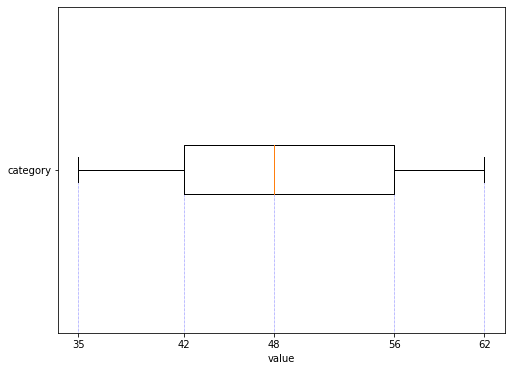

In [4]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(df["Age"], vert=False, manage_ticks=True)
ax.set_xlabel('value')
ax.set_xticks([15])

ax.set_yticks([1])
ax.set_yticklabels(['category'])

quantiles = np.quantile(df["Age"],[0,0.25,0.5,0.75,1])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, label = 'quantiles',
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

Q5. Display full name of patients who are born in 1986.

In [5]:
df_temp = df_PA.set_index(["DateOfBirth"])
df1 = df_temp.loc["1986"]
df1[["FirstName", "LastName"]]

,FirstName,LastName
DateOfBirth,,
1986-05-31 09:36:05.715918,Gabriel,Joseph
1986-07-24 17:36:00.791027,Lincoln,Brenda
1986-11-26 10:44:22.627622,Ala,Halpert
1986-01-08 02:34:04.595766,Lolita,Darci
1986-05-29 00:35:58.693977,Fadel,Bernardt
1986-02-11 06:22:40.733949,Bentley,Kippax
1986-04-15 00:49:58.689775,Vale,Olanda
1986-11-19 23:50:47.954773,Britt,Dureden
1986-07-10 16:27:30.640009,Cristabel,Chatel


Q6. Create a jointplot on expected mortality & expected length of stay.

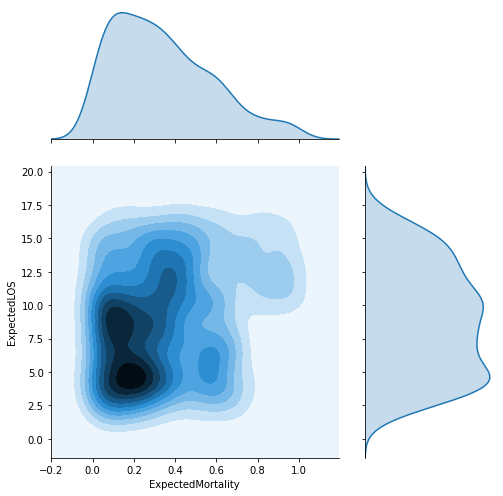

In [6]:
sns.jointplot(data=df_RR, x='ExpectedMortality',y='ExpectedLOS', kind ="kde", height = 7, ratio = 2)

Q16. Plot a graph to show the distribution of expected length of stay.

<AxesSubplot:xlabel='ExpectedLOS'>

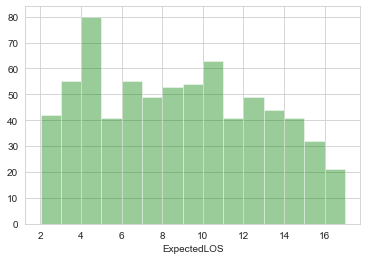

In [7]:
sns.set_style('whitegrid')
sns.distplot(df_RR['ExpectedLOS'],kde=False, color='green', bins=15)

distribution shows the maximum occurances is between 4 to 5 and then 10 to 11.

Q17. Create a heat map to show the correlation between the column values of Edvisits.

In [8]:
tc=df_EDV.corr(method='pearson')
tc

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

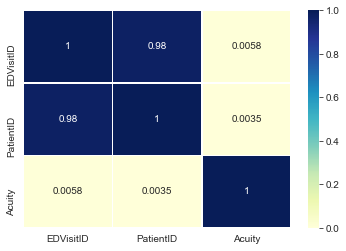

In [9]:
sns.heatmap(tc,annot=True,vmin=0, vmax=1, cmap="YlGnBu", linewidths=.5)

Q18. Add column 'Age' in Patient table.

In [10]:
from datetime import date
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df_PA['Age'] = df_PA['DateOfBirth'].apply(age)
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.089852,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762384,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.634776,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.949547,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761035,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814278,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.883969,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569185,Male,Black/African-American,English,59


Q28. Which reason of visit has maximum mortality rate.

In [11]:
result = df_EDV.merge(df_RR, how = "outer")
result

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1,1,2020-01-01 00:00:00.000000,2020-01-01 11:20:22.924037,1,Stomach Ache,Admitted,389.0,2018-01-01,2018-01-04 19:59:31.390889,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,46,1,2020-01-01 11:55:53.030096,2020-01-01 12:04:19.052237,2,Shortness of Breath,Admitted,389.0,2018-01-01,2018-01-04 19:59:31.390889,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
2,424,1,2020-01-06 03:40:15.838555,2020-01-06 06:49:06.996879,1,Stomach Ache,Discharged,389.0,2018-01-01,2018-01-04 19:59:31.390889,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
3,12,12,2020-01-01 02:45:40.302013,2020-01-02 02:00:00.517383,2,Migraine,Admitted,568.0,2018-01-01,2018-01-09 09:21:47.300098,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0
4,103,12,2020-01-02 02:29:50.908381,2020-01-02 02:34:11.803088,1,Migraine,Discharged,568.0,2018-01-01,2018-01-09 09:21:47.300098,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,1183,929,2020-01-15 10:38:42.569997,2020-01-16 02:31:52.023450,4,Chest Pain,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,1186,932,2020-01-15 11:52:37.540239,2020-01-16 10:19:41.569517,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,1187,933,2020-01-15 12:11:11.677812,2020-01-15 16:41:15.222748,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,1188,934,2020-01-15 12:21:46.005588,2020-01-15 18:32:21.059715,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
i = result["ExpectedMortality"].idxmax()
result.iloc[i]["ReasonForVisit"]

'Pneumonia'

Q29. Calculate average LOS.

In [13]:
df_RR["ExpectedLOS"].mean()

8.824589159156156

Q30. Which patient id has most entries in readmission registry.

The efficient solution is using the value_counts()

In [14]:
#optimal solution using value_counts
i = (df_RR["PatientID"].value_counts()).idxmax()
res = df_RR.iloc[i]
res["PatientID"]

22

In [15]:
#other solution using groupby
idx = (df_RR.groupby(["PatientID"]).size()).idxmax()
res1 = df_RR.iloc[idx]
res1["PatientID"]

22

Q40. Plot a graph showing the count of patients for the reason visited the hospotal.

In [16]:
reasonOfVisit_count = df_EDV.groupby("ReasonForVisit").count()[["PatientID"]]
reasonOfVisit_count

,PatientID
ReasonForVisit,
Accident,39
Bleeding,31
Car Accident,17
Chest Pain,109
Cough,1
Fever,234
Gun Shot,16
Intoxication,30
Laceration,30


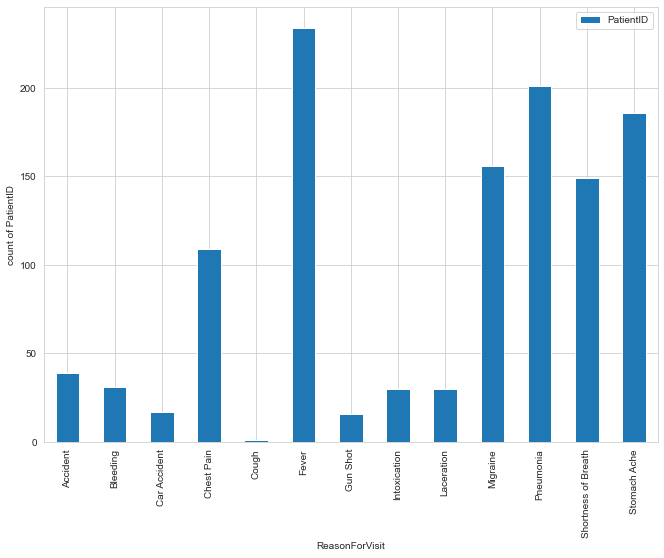

In [17]:
reasonOfVisit_count.plot(kind='bar', figsize = (11, 8), ylabel = "count of PatientID", )
plt.show()

Q41. Find the visit type with maximum 'No Show'.

In [3]:
df_AV["VisitType"]
df_AV["VisitStatus"]

0       No Show
1       No Show
2       No Show
3       No Show
4       No Show
         ...   
945    Canceled
946    Canceled
947    Canceled
948    Canceled
949    Canceled
Name: VisitStatus, Length: 950, dtype: object

In [19]:
i = result["ExpectedMortality"].idxmax()
result.iloc[i]["ReasonForVisit"]

'Pneumonia'

In [20]:
i = (df_AV["VisitType"].value_counts()).idxmax()
res = df_RR.iloc[i]
res["PatientID"]

TypeError: Cannot index by location index with a non-integer key

In [4]:
(df_AV.groupby(["VisitType", "VisitStatus"]).size())


VisitType     VisitStatus
Follow Up     Canceled        29
              Completed      266
              No Show         41
New           Canceled         5
              Completed      120
Physical      Canceled        11
              Completed      155
              No Show         39
Telemedicine  Canceled        15
              Completed      195
              No Show         74
dtype: int64

In [22]:
df_AV.groupby('VisitType').apply(df_AV['VisitStatus'].value_counts().idxmax()) 

TypeError: 'str' object is not callable

Q42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [19]:
df_P_temp = df_P.set_index('ProviderID') 
(df_P_temp.loc[df_P_temp['ProviderSpecialty']== "Surgery",'ProviderName']).loc[11:20]

ProviderID
11       Kim Kimberly
12           Sarah Ab
13    Abigail Marriot
14            Dave Yu
15    Christian Saint
16       Perry Pardon
Name: ProviderName, dtype: object

Q52. Retrieve the row with minimum DBP using sorting technique.

In [20]:
r= df_AV.sort_values(by="BloodPressureDiastolic", ascending=True)
r

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.180570,7,Follow Up,120.0,51.695653,53.310495,Completed
456,32,35,32,2019-02-01,2019-01-14 23:07:20.014656,8,New,121.0,54.099878,80.480990,Completed
118,214,852,38,2019-03-31,2019-03-14 18:17:19.978922,10,Physical,123.0,54.285242,93.909856,No Show
231,909,860,3,2019-04-21,2019-04-12 20:49:25.742060,5,Telemedicine,122.0,56.594973,85.179520,Completed
545,372,557,3,2019-02-21,2019-02-13 13:05:43.262670,11,Follow Up,125.0,57.043944,73.071398,Completed
...,...,...,...,...,...,...,...,...,...,...,...
805,666,818,33,2019-02-09,2019-02-01 02:22:14.760665,10,Physical,NaN,NaN,NaN,Completed
807,555,72,35,2019-04-30,2019-04-02 08:38:32.356866,7,Follow Up,NaN,NaN,NaN,Completed
808,645,90,37,2019-03-16,2019-02-16 17:45:16.907732,1,Telemedicine,NaN,NaN,NaN,Completed
810,773,858,24,2019-03-12,2019-02-25 02:59:43.233029,2,Follow Up,NaN,NaN,NaN,Completed


In [21]:
r.iloc[0]

VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.180570
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                          120.0
BloodPressureDiastolic                     51.695653
Pulse                                      53.310495
VisitStatus                                Completed
Name: 757, dtype: object

Q53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [103]:
#the number of patients admitted to each ReasonForVisit are as follows
(df_EDV.groupby(["ReasonForVisit"])).count()["PatientID"]

ReasonForVisit
Accident                39
Bleeding                31
Car Accident            17
Chest Pain             109
Cough                    1
Fever                  234
Gun Shot                16
Intoxication            30
Laceration              30
Migraine               156
Pneumonia              201
Shortness of Breath    149
Stomach Ache           186
Name: PatientID, dtype: int64

In [104]:
#prompt the user the list to select from
ReasonForVisit_List = ['Accident', 'Bleeding', 'Car Accident', 'Chest Pain', 'Cough', 'Fever', 'Gun Shot', 'Intoxication', 'Laceration', 'Migraine', 'Pneumonia', 'Shortness of Breath', 'Stomach Ache']
for i in ReasonForVisit_List:
    print(i)

Accident
Bleeding
Car Accident
Chest Pain
Cough
Fever
Gun Shot
Intoxication
Laceration
Migraine
Pneumonia
Shortness of Breath
Stomach Ache


In [ ]:
#get a user input
user_input =input("Enter the ReasonForVisit from the list.  ")
user_input

In [ ]:
if user_input in ReasonForVisit_List:
    patient_count = (df_EDV.groupby(["ReasonForVisit"])).count()["PatientID"].loc[user_input]
    print(f"the number of patients admitted to {user_input} are {patient_count} ")
else :
    print("wrong value")    

Q54. Mortality O.E.

In [70]:
df_RR["DischargeDisposition"].value_counts()

Home        577
Expired     104
Transfer     39
Name: DischargeDisposition, dtype: int64

In [71]:
ObeservedMortality = df_RR["DischargeDisposition"].value_counts()['Expired']
ObeservedMortality

104

In [72]:
ExpectedMortality = df_RR["ExpectedMortality"].count()
ExpectedMortality

720

In [73]:
Mortality_O_E = ObeservedMortality / ExpectedMortality
Mortality_O_E

0.14444444444444443

Q64. "Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)"

In [74]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [75]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [76]:
np.dot(a,b)

array([[10, 13],
       [28, 40]])

Q65. Get the  number of patients based on service and primary diagnosis.

In [82]:
df_RR.groupby(["Service", "PrimaryDiagnosis"]).count()["PatientID"]

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

Q66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [83]:
array1 = np.arange(1,31).reshape(6,5)
array1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [84]:
array1[[0,4,5], 3:5]

array([[ 4,  5],
       [24, 25],
       [29, 30]])

Q76. Reverse the string without using inbuilt functions.

In [85]:
def reverse_string(s):
    return s[::-1]

input_str = 'ABCDEF'
reverse_string(input_str)


'FEDCBA'

Q77. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [50]:
X = df_EDV["Acuity"]
Y = df_EDV["EDDisposition"]

<BarContainer object of 1199 artists>

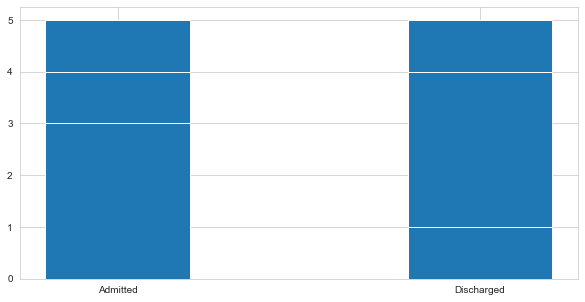

In [51]:
fig = plt.figure(figsize = (10, 5))
bar = plt.bar(Y, X,  width = 0.4)

bar[0].set_hatch('/')
bar[1].set_hatch('o')
bar[2].set_hatch('*')
bar[3].set_hatch('$')
bar[4].set_hatch('#')
bar